In [ ]:
# Looking into correlations given all data

import pandas as pd
import numpy as np

file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Select numeric columns (excluding location columns)
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in ['zip_code', 'latitude', 'longitude', 'missing_count']]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Flatten the matrix, keep only one triangle (no duplicates)
corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation descending
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values('abs_corr', ascending=False).drop(columns='abs_corr')

# Display
display(corr_pairs_sorted)


Feature 1                       Feature 2  \
21                            price                    nbr_bedrooms   
117                      fl_terrace                     terrace_sqm   
50                   total_area_sqm                    nbr_bedrooms   
33                construction_year                  total_area_sqm   
18                            price                  total_area_sqm   
..                              ...                             ...   
12                               id                fl_swimming_pool   
140                      garden_sqm  primary_energy_consumption_sqm   
151  primary_energy_consumption_sqm                cadastral_income   
74                 surface_land_sqm                cadastral_income   
15                               id               fl_double_glazing   

     Correlation  
21      0.352444  
117     0.296247  
50      0.222688  
33     -0.214476  
18      0.199648  
..           ...  
12     -0.000368  
140    -0.000265  
151    -0.000241  
74      0.000192  
15      0.000096  

[153 rows x 3 columns]

In [18]:
# Adapting to not look at outliers:

import pandas as pd
import numpy as np

file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# -------------------------------------------------------------------
# Step 1: Select numeric columns (excluding certain ones)
# -------------------------------------------------------------------
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in ['zip_code', 'latitude', 'longitude', 'missing_count']]

# -------------------------------------------------------------------
# Step 2: Remove outliers (trim 5% lowest and 5% highest for each column)
# -------------------------------------------------------------------
df_trimmed = df.copy()

for col in numeric_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df_trimmed[col] = df[col].clip(lower=lower, upper=upper)

# -------------------------------------------------------------------
# Step 3: Compute correlation matrix on trimmed data
# -------------------------------------------------------------------
corr_matrix = df_trimmed[numeric_cols].corr()

# -------------------------------------------------------------------
# Step 4: Flatten the matrix (keep only one triangle)
# -------------------------------------------------------------------
corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# -------------------------------------------------------------------
# Step 5: Sort by absolute correlation descending
# -------------------------------------------------------------------
corr_pairs['abs_corr'] = corr_pairs['Correlation'].abs()
corr_pairs_sorted = corr_pairs.sort_values('abs_corr', ascending=False).drop(columns='abs_corr')

# -------------------------------------------------------------------
# Step 6: Display results
# -------------------------------------------------------------------
display(corr_pairs_sorted)



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/123103787.py:23: FutureWarning:

Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Feature 1          Feature 2  Correlation
105       fl_garden         garden_sqm     0.752864
44   total_area_sqm       nbr_bedrooms     0.728502
92       fl_terrace        terrace_sqm     0.709732
28            price   cadastral_income     0.660974
16            price     total_area_sqm     0.591209
..              ...                ...          ...
3                id   surface_land_sqm    -0.001112
0                id              price     0.000713
15            price  construction_year    -0.000677
14               id   cadastral_income    -0.000392
13               id  fl_double_glazing     0.000031

[120 rows x 3 columns]

In [19]:
# Removing the logical correlations between fl_garden and fl_terrace and their areas

import pandas as pd
import numpy as np

file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# -------------------------------------------------------------------
# Step 1: Select numeric columns (excluding certain ones)
# -------------------------------------------------------------------
numeric_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in ['zip_code', 'latitude', 'longitude', 'missing_count']]

# -------------------------------------------------------------------
# Step 2: Remove outliers (clip 5–95%)
# -------------------------------------------------------------------
df_trimmed = df.copy()
for col in numeric_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df_trimmed[col] = df[col].clip(lower=lower, upper=upper)

# -------------------------------------------------------------------
# Step 3: Compute correlation matrix
# -------------------------------------------------------------------
corr_matrix = df_trimmed[numeric_cols].corr()

# -------------------------------------------------------------------
# Step 4: Flatten the matrix (upper triangle)
# -------------------------------------------------------------------
corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# -------------------------------------------------------------------
# Step 5: Remove only the expected flag/value correlations
# -------------------------------------------------------------------
flag_links = {
    'fl_terrace': 'terrace_sqm',
    'fl_garden': 'garden_sqm'
}

# Exclude only the direct flag/value pair
def is_expected_flag_pair(row):
    return (row['Feature 1'], row['Feature 2']) in flag_links.items() or \
           (row['Feature 2'], row['Feature 1']) in flag_links.items()

corr_pairs_filtered = corr_pairs[~corr_pairs.apply(is_expected_flag_pair, axis=1)]

# -------------------------------------------------------------------
# Step 6: Sort by absolute correlation descending
# -------------------------------------------------------------------
corr_pairs_filtered['abs_corr'] = corr_pairs_filtered['Correlation'].abs()
corr_pairs_sorted = corr_pairs_filtered.sort_values('abs_corr', ascending=False).drop(columns='abs_corr')

# -------------------------------------------------------------------
# Step 7: Display results
# -------------------------------------------------------------------
display(corr_pairs_sorted)


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/3774696311.py:22: FutureWarning:

Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/3774696311.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Feature 1                       Feature 2  Correlation
44     total_area_sqm                    nbr_bedrooms     0.728502
28              price                cadastral_income     0.660974
16              price                  total_area_sqm     0.591209
54   surface_land_sqm                   nbr_frontages     0.569734
39  construction_year  primary_energy_consumption_sqm    -0.569118
..                ...                             ...          ...
3                  id                surface_land_sqm    -0.001112
0                  id                           price     0.000713
15              price               construction_year    -0.000677
14                 id                cadastral_income    -0.000392
13                 id               fl_double_glazing     0.000031

[118 rows x 3 columns]

/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/271123175.py:35: FutureWarning:

Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



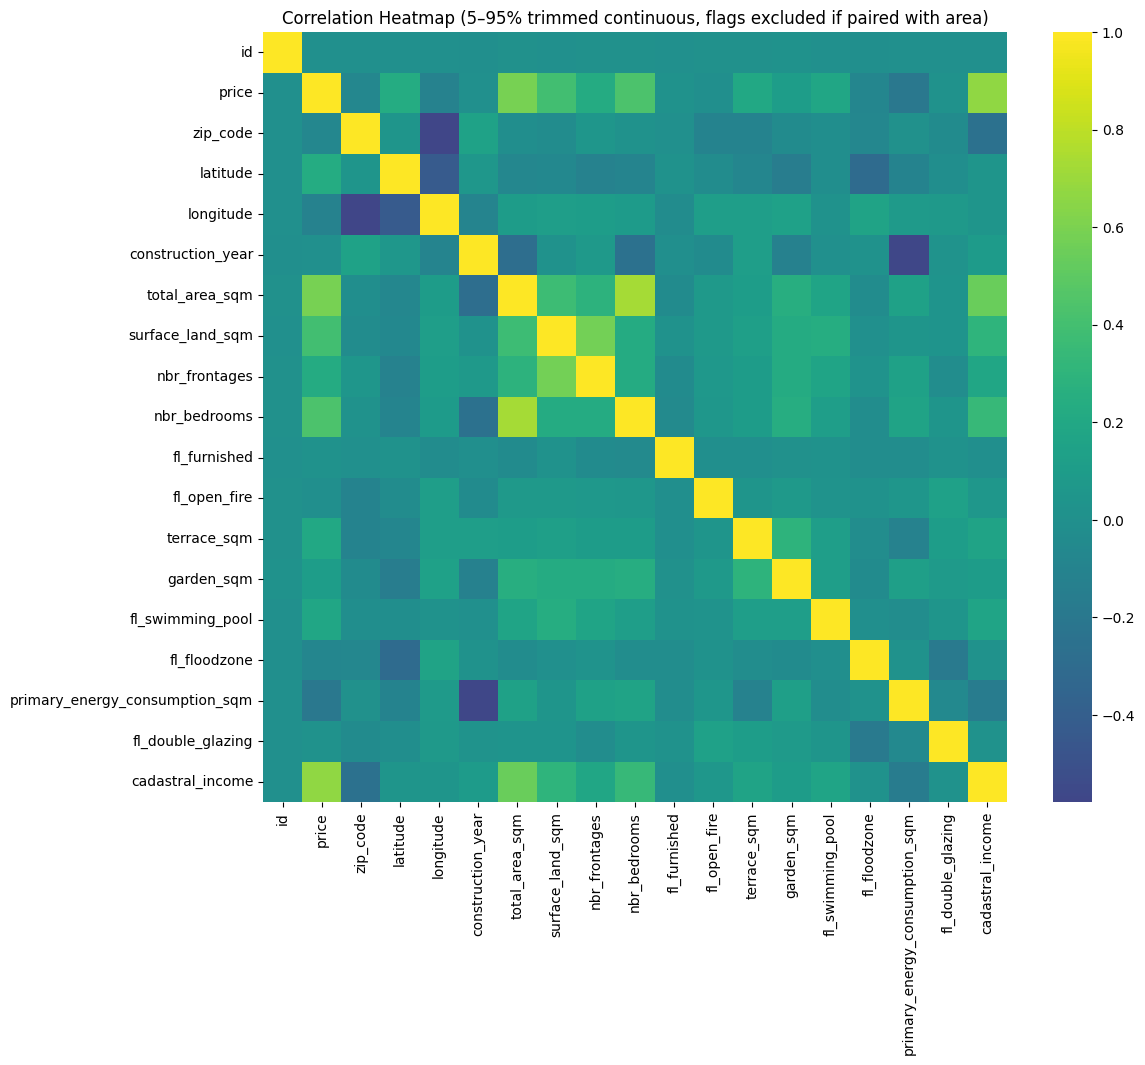

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# Flag/area pairs
flag_links = {
    'fl_terrace': 'terrace_sqm',
    'fl_garden': 'garden_sqm'
}

df_processed = df.copy()

# Select numeric columns
numeric_cols = df_processed.select_dtypes(include='number').columns.tolist()

# Exclude the flags that have area pairs from correlation
flags_to_exclude = list(flag_links.keys())
numeric_cols_for_corr = [col for col in numeric_cols if col not in flags_to_exclude]

# Identify continuous columns for 5–95% trimming
continuous_cols = [col for col in numeric_cols_for_corr 
                   if df_processed[col].dropna().nunique() > 2]  # exclude binary columns

# -------------------------------------------------------------------
# Step 1: Trim continuous numeric columns only (exclude binary)
# -------------------------------------------------------------------
df_trimmed = df_processed.copy()
for col in continuous_cols:
    lower = df_trimmed[col].quantile(0.05)
    upper = df_trimmed[col].quantile(0.95)
    df_trimmed[col] = df_trimmed[col].clip(lower=lower, upper=upper)

# -------------------------------------------------------------------
# Step 2: Correlation heatmap
# -------------------------------------------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(df_trimmed[numeric_cols_for_corr].corr(), annot=False, cmap="viridis", center=0)
plt.title('Correlation Heatmap (5–95% trimmed continuous, flags excluded if paired with area)')
plt.show()



/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/3810429280.py:49: FutureWarning:

Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



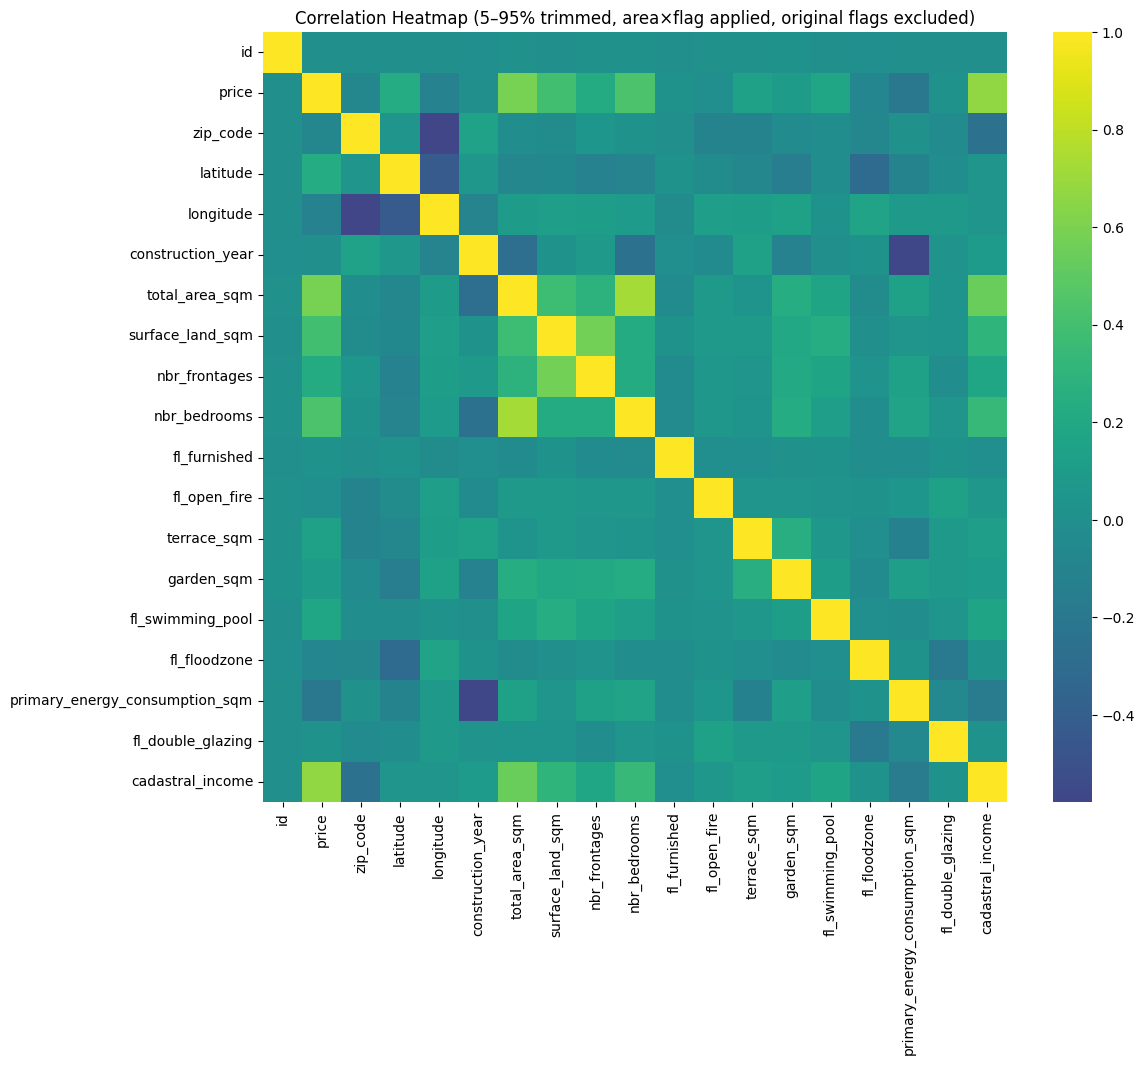

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------
# Step 0: Load data
# -------------------------------------------------------------------
file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# -------------------------------------------------------------------
# Step 1: Define flag/area pairs and apply area*flag
# -------------------------------------------------------------------
flag_links = {
    'fl_terrace': 'terrace_sqm',
    'fl_garden': 'garden_sqm'
}

df_processed = df.copy()
for flag, area in flag_links.items():
    if flag in df_processed.columns and area in df_processed.columns:
        # Multiply area by flag → area is 0 if flag=0
        df_processed[area] = df_processed[area].fillna(0) * df_processed[flag].fillna(0)

# -------------------------------------------------------------------
# Step 2: Identify numeric columns
# -------------------------------------------------------------------
numeric_cols = df_processed.select_dtypes(include='number').columns.tolist()

# Exclude the flags that were used to adjust areas
flags_to_exclude = list(flag_links.keys())
numeric_cols_for_corr = [col for col in numeric_cols if col not in flags_to_exclude]

# Identify binary flags among remaining numeric columns
binary_flags = [col for col in numeric_cols_for_corr 
                if df_processed[col].dropna().isin([0,1]).all()]

# Continuous numeric columns (to trim 5–95%)
continuous_cols = [col for col in numeric_cols_for_corr if col not in binary_flags]

# -------------------------------------------------------------------
# Step 3: Trim continuous columns (exclude flags)
# -------------------------------------------------------------------
df_trimmed = df_processed.copy()
for col in continuous_cols:
    lower = df_trimmed[col].quantile(0.05)
    upper = df_trimmed[col].quantile(0.95)
    df_trimmed[col] = df_trimmed[col].clip(lower=lower, upper=upper)

# -------------------------------------------------------------------
# Step 4: Compute correlation matrix (exclude original flags)
# -------------------------------------------------------------------
corr_matrix = df_trimmed[numeric_cols_for_corr].corr()

# -------------------------------------------------------------------
# Step 5: Display heatmap
# -------------------------------------------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap="viridis", center=0)
plt.title('Correlation Heatmap (5–95% trimmed, area×flag applied, original flags excluded)')
plt.show()


In [31]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"  # VS Code native renderer
pio.renderers.default = "notebook_connected"

# Load data
file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# -------------------------------------------------------------------
# Step 1: Define columns to trim (latitude, longitude, price)
# -------------------------------------------------------------------
trim_cols = ['latitude', 'longitude', 'price']

df_trimmed = df.copy()
for col in trim_cols:
    if col in df_trimmed.columns:
        lower = df_trimmed[col].quantile(0.05)
        upper = df_trimmed[col].quantile(0.95)
        df_trimmed[col] = df_trimmed[col].clip(lower=lower, upper=upper)

# -------------------------------------------------------------------
# Step 2: Plot map
# -------------------------------------------------------------------
fig = px.scatter_map(
    df_trimmed,
    lat="latitude",
    lon="longitude",
    color="price",
    zoom=7,
    color_continuous_scale="Viridis",
    hover_data=['price', 'total_area_sqm', 'nbr_bedrooms']  # optional
)
fig.show()


In [38]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "vscode"  # VS Code native renderer
pio.renderers.default = "notebook_connected"

# Load data
file_path = '../../Kristin/cleaned_properties.csv'
df = pd.read_csv(file_path)

# -------------------------------------------------------------------
# Step 1: Trim price outliers (5-95%)
# -------------------------------------------------------------------
if 'price' in df.columns:
    lower_price = df['price'].quantile(0.03)
    upper_price = df['price'].quantile(0.97)
    df['price'] = df['price'].clip(lower=lower_price, upper=upper_price)

# -------------------------------------------------------------------
# Step 2: Filter properties within Belgium (lat/lon bounding box)
# -------------------------------------------------------------------
lat_min, lat_max = 49.5, 51.5
lon_min, lon_max = 2.5, 6.5

df_belgium = df[
    (df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
    (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)
].copy()

print(f"Number of properties in Belgium: {len(df_belgium)}")

# -------------------------------------------------------------------
# Step 3: Plot map
# -------------------------------------------------------------------
fig = px.scatter_map(
    df_belgium,
    lat="latitude",
    lon="longitude",
    color="price",
    zoom=7,
    color_continuous_scale="Viridis",
    hover_data=['price', 'total_area_sqm', 'nbr_bedrooms']  # optional
)
fig.show()



Number of properties in Belgium: 61401


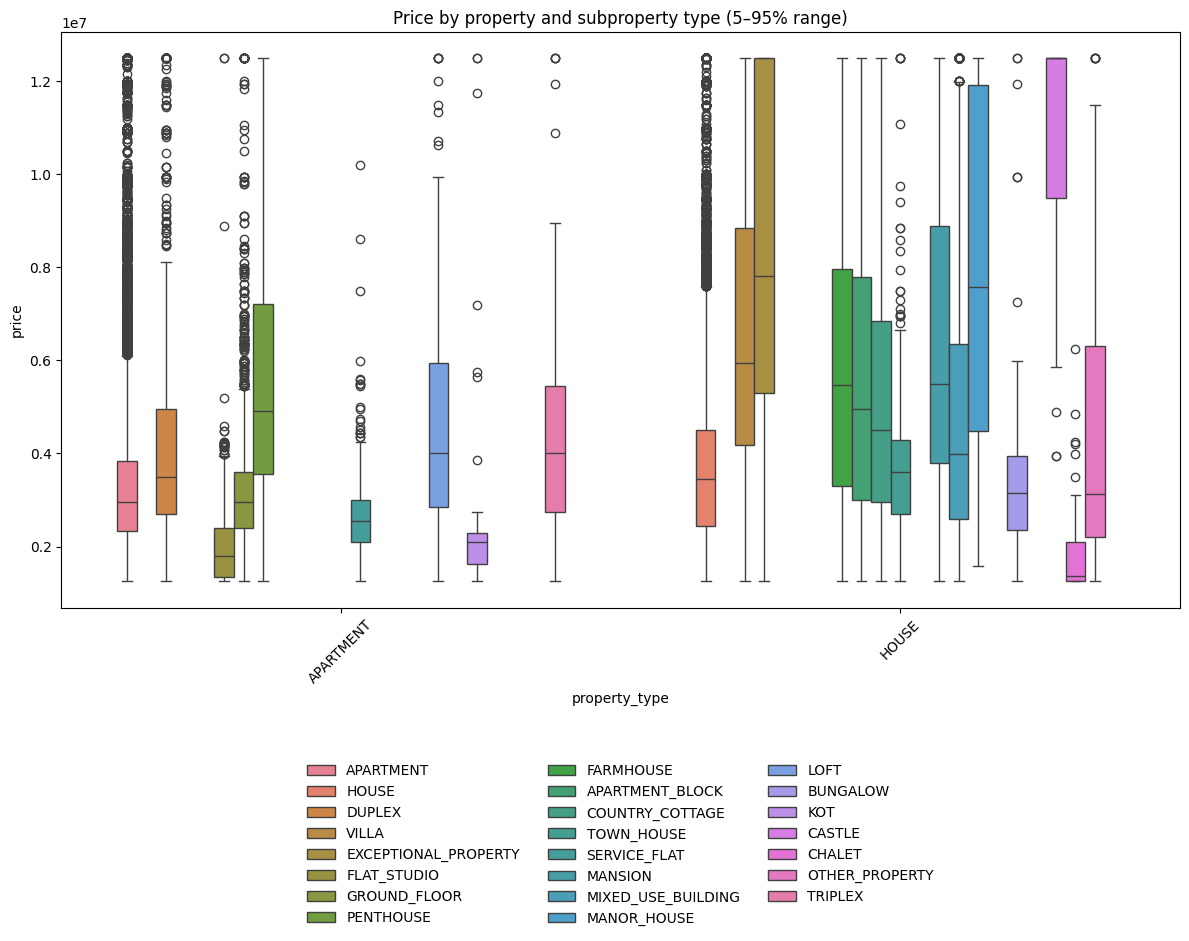

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded
# -------------------------------------------------------------------
# Step 1: Trim price to 5–95% percentile to remove outliers
# -------------------------------------------------------------------
lower_price = df['price'].quantile(0.03)
upper_price = df['price'].quantile(0.97)

df_trimmed = df.copy()
df_trimmed['price'] = df_trimmed['price'].clip(lower=lower_price, upper=upper_price)

# -------------------------------------------------------------------
# Step 2: Boxplot per property/subproperty type
# -------------------------------------------------------------------
plt.figure(figsize=(12,10))
sns.boxplot(
    data=df_trimmed,
    x="property_type",
    y="price",
    hue="subproperty_type"
)
plt.xticks(rotation=45)
plt.title("Price by property and subproperty type (5–95% range)")

# Move legend to bottom and wrap to multiple rows
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=3,  # pick number of columns per row
    frameon=False
)

plt.tight_layout()
plt.show()


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/3193117757.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




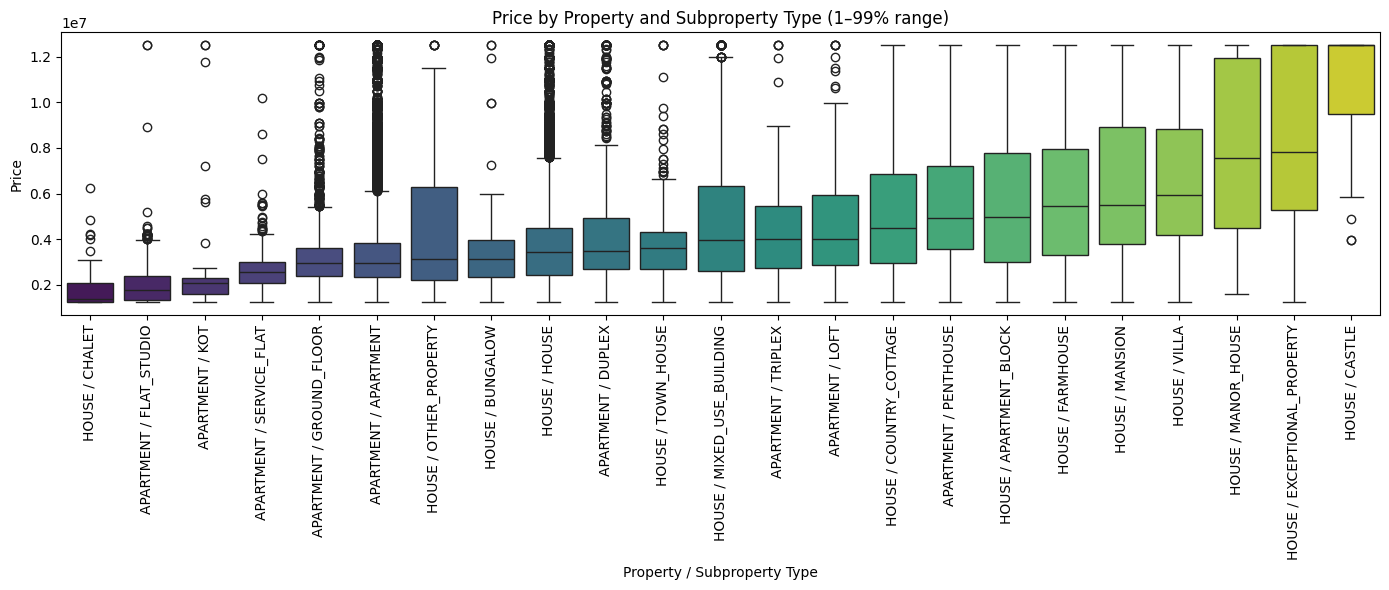

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Trim price to 3–97% percentile
lower_price = df['price'].quantile(0.01)
upper_price = df['price'].quantile(0.99)

df_trimmed = df.copy()
df_trimmed['price'] = df_trimmed['price'].clip(lower=lower_price, upper=upper_price)

# Step 2: Create combined label for x-axis
df_trimmed['property_subtype'] = df_trimmed['property_type'] + " / " + df_trimmed['subproperty_type']

# Step 3: Sort by median price
median_prices = df_trimmed.groupby('property_subtype')['price'].median().sort_values()
sorted_categories = median_prices.index.tolist()

# Step 4: Plot
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_trimmed,
    x='property_subtype',
    y='price',
    order=sorted_categories,          # ensures sorted order
    palette='viridis'                 # color coding
)

plt.xticks(rotation=90)
plt.title("Price by Property and Subproperty Type (1–99% range)")
plt.xlabel("Property / Subproperty Type")
plt.ylabel("Price")

plt.tight_layout()
plt.show()


/var/folders/87/3rmswg3n0_b52bj0cbkjgwjw0000gn/T/ipykernel_3540/1341432681.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




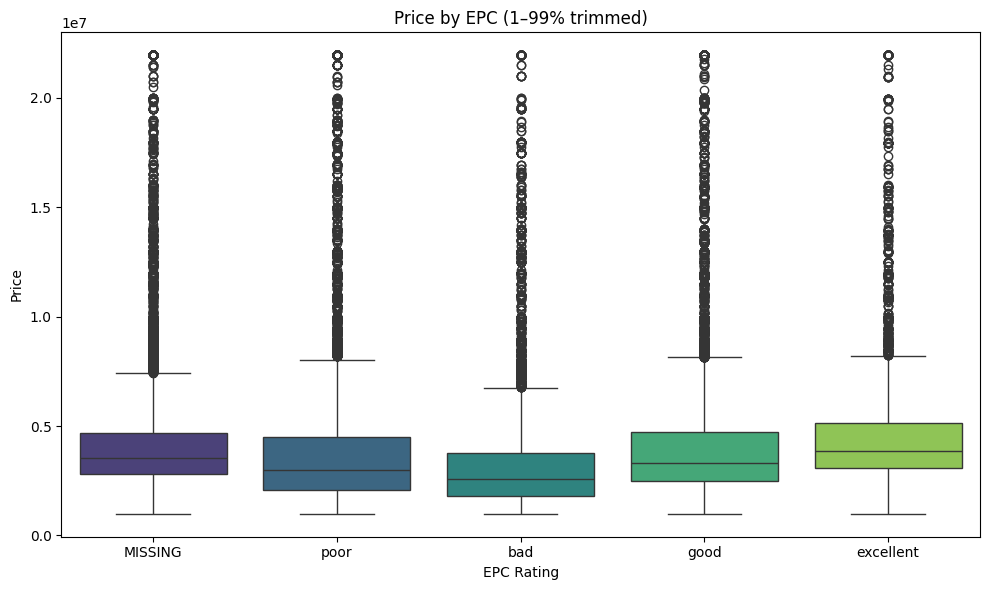

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Trim price to 1–99% percentile to remove extreme outliers
lower_price = df['price'].quantile(0.01)
upper_price = df['price'].quantile(0.99)

df_trimmed = df.copy()
df_trimmed['price'] = df_trimmed['price'].clip(lower=lower_price, upper=upper_price)

# Step 2: Define custom order for EPC (or any categorical column)
epc_order = ['MISSING', 'poor', 'bad', 'good', 'excellent']

# Step 3: Convert EPC column to ordered categorical
df_trimmed['epc'] = pd.Categorical(df_trimmed['epc'], categories=epc_order, ordered=True)

# Step 4: Boxplot with ordered categories
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_trimmed,
    x='epc',
    y='price',
    palette='viridis'
)

plt.title("Price by EPC (1–99% trimmed)")
plt.xlabel("EPC Rating")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


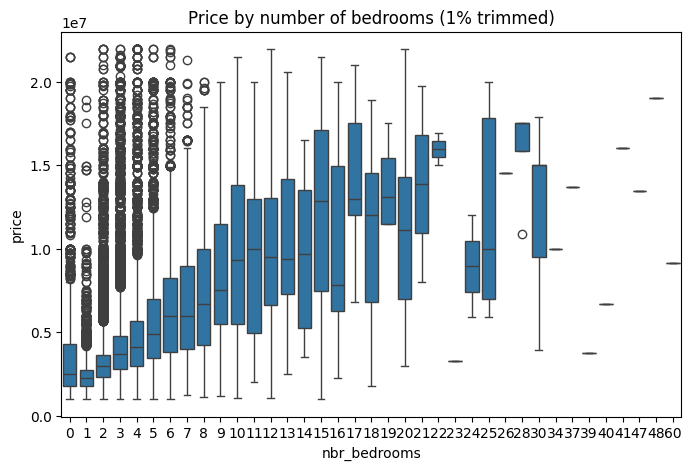

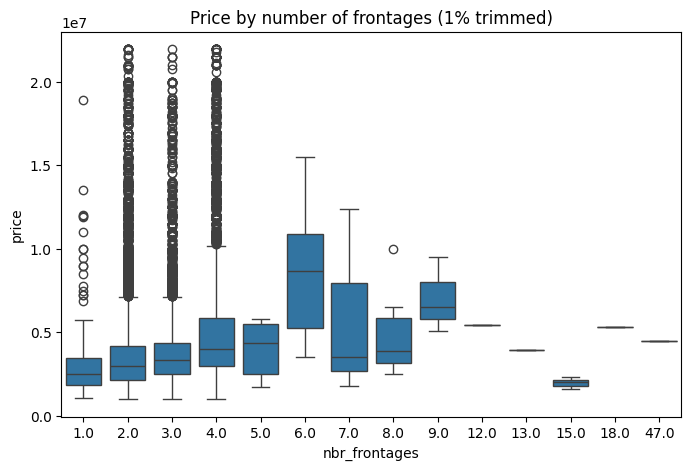

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate 1st and 99th percentiles
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)

# Filter dataframe
df_filtered = df[(df['price'] >= lower) & (df['price'] <= upper)]

# Boxplot: Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x="nbr_bedrooms", y="price")
plt.title("Price by number of bedrooms (1% trimmed)")
plt.show()

# Boxplot: Frontages vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df_filtered, x="nbr_frontages", y="price")
plt.title("Price by number of frontages (1% trimmed)")
plt.show()


In [55]:
import pandas as pd
import pprint

# Load raw and cleaned data
df_raw = pd.read_csv("../../data/raw/immoweb_data.csv")
df_clean = pd.read_csv("../../data/processed/cleaned_properties.csv")

# Function to summarize a dataset
def summarize_data(df, name="Dataset"):
    summary = {}
    n_rows, n_cols = df.shape
    summary['Rows'] = n_rows
    summary['Columns'] = n_cols
    summary['Rows with any missing'] = df.isna().any(axis=1).sum()
    
    # Missing per column
    missing_count = df.isna().sum()
    missing_pct = (df.isna().mean() * 100).round(2)
    summary['Missing per column'] = pd.concat([missing_count, missing_pct], axis=1)\
                                      .rename(columns={0:'Count', 1:'%'}).to_dict(orient='index')
    
    # Numeric summary
    numeric_cols = ['price', 'nbr_bedrooms', 'nbr_frontages']  # adjust as needed
    numeric_summary = {}
    for col in numeric_cols:
        numeric_summary[col] = {
            'min': df[col].min(),
            'median': df[col].median(),
            'max': df[col].max(),
            '1% low/high outliers': ((df[col] < df[col].quantile(0.01)) | (df[col] > df[col].quantile(0.99))).sum()
        }
    summary['Numeric summary'] = numeric_summary
    
    # Categorical summary
    cat_summary = {}
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        cat_summary[col] = {
            'unique_values': df[col].nunique(),
            'top_3': df[col].value_counts().head(3).to_dict()
        }
    summary['Categorical summary'] = cat_summary
    
    return summary

# Summarize both datasets
raw_summary = summarize_data(df_raw, "Raw Data")
cleaned_summary = summarize_data(df_clean, "Cleaned Data")

# Display nicely
print("=== RAW DATA ===")
pprint.pprint(raw_summary)
print("\n=== CLEANED DATA ===")
pprint.pprint(cleaned_summary)


=== RAW DATA ===
{'Categorical summary': {'epc': {'top_3': {'B': 10483,
                                           'C': 8953,
                                           'MISSING': 24003},
                                 'unique_values': 10},
                         'equipped_kitchen': {'top_3': {'HYPER_EQUIPPED': 9058,
                                                        'INSTALLED': 19373,
                                                        'MISSING': 33022},
                                              'unique_values': 9},
                         'heating_type': {'top_3': {'FUELOIL': 7711,
                                                    'GAS': 31875,
                                                    'MISSING': 31444},
                                          'unique_values': 8},
                         'locality': {'top_3': {'Antwerp': 5880,
                                                'Brussels': 7958,
                                                'Liège': 46

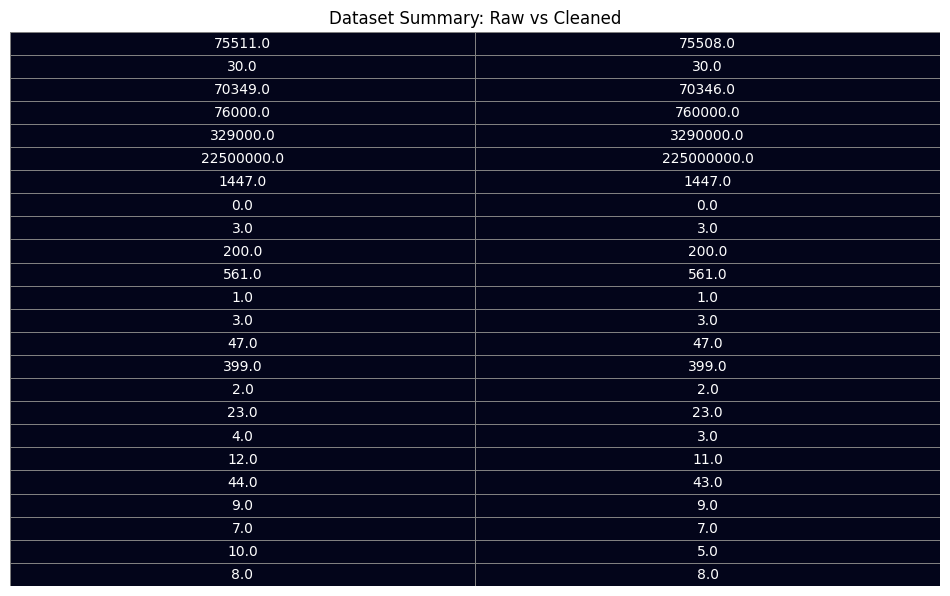

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_raw = pd.read_csv("../../data/raw/immoweb_data.csv")
df_clean = pd.read_csv("../../data/processed/cleaned_properties.csv")

# Define numeric and categorical columns to summarize
numeric_cols = ['price', 'nbr_bedrooms', 'nbr_frontages']
cat_cols = df_raw.select_dtypes(include='object').columns.tolist()

# Helper function to create summary dataframe
def create_summary(df, label):
    summary = {}
    summary['Rows'] = df.shape[0]
    summary['Columns'] = df.shape[1]
    summary['Rows with missing'] = df.isna().any(axis=1).sum()
    
    for col in numeric_cols:
        summary[f"{col} min"] = df[col].min()
        summary[f"{col} median"] = df[col].median()
        summary[f"{col} max"] = df[col].max()
        summary[f"{col} 1% outliers"] = ((df[col] < df[col].quantile(0.01)) | 
                                          (df[col] > df[col].quantile(0.99))).sum()
    
    for col in cat_cols:
        summary[f"{col} unique"] = df[col].nunique()
    
    return pd.DataFrame(summary, index=[label]).T

# Create summary tables
raw_summary = create_summary(df_raw, 'Raw')
clean_summary = create_summary(df_clean, 'Cleaned')

# Merge for side-by-side comparison
comparison = pd.concat([raw_summary, clean_summary], axis=1)
comparison.columns = ['Raw Data', 'Cleaned Data']

# Visualize as a colourful table
plt.figure(figsize=(12, max(6, comparison.shape[0]*0.3)))
sns.heatmap(pd.isna(comparison), cbar=False, annot=comparison, fmt='', linewidths=.5, linecolor='gray')
plt.title("Dataset Summary: Raw vs Cleaned")
plt.axis('off')
plt.show()


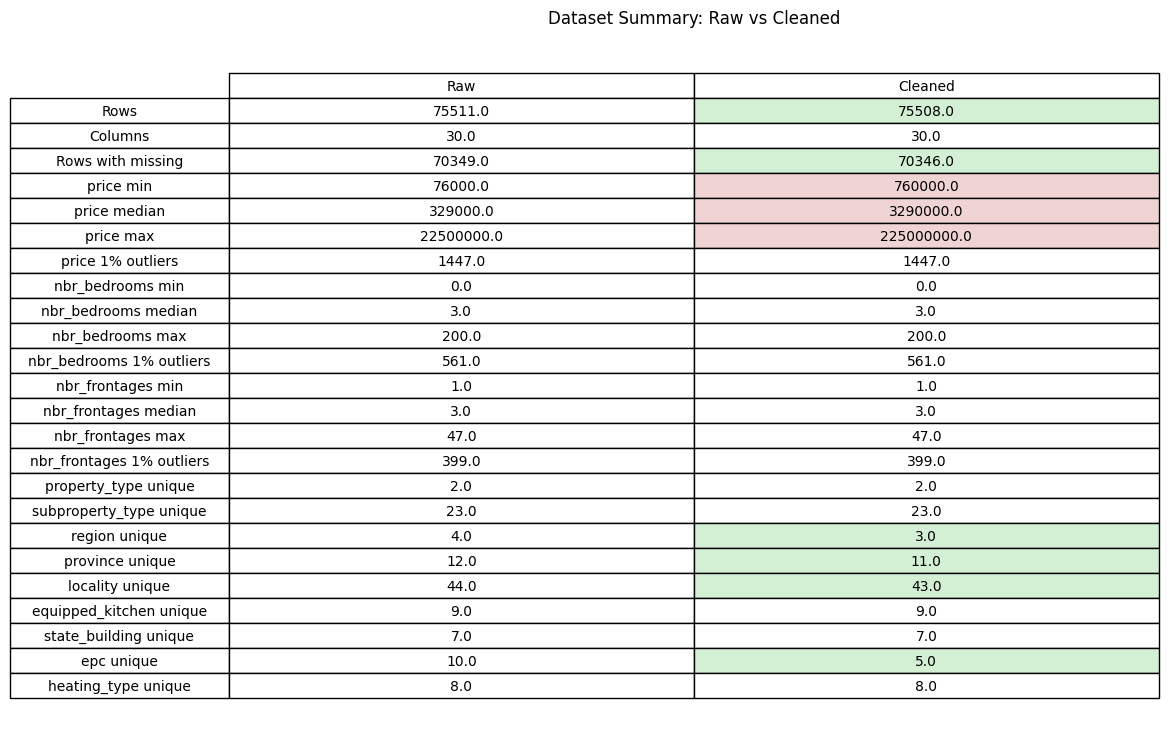

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine raw and cleaned summaries (reuse create_summary logic)
comparison = pd.concat([raw_summary, clean_summary], axis=1)
comparison.columns = ['Raw', 'Cleaned']

# Plot as a table
fig, ax = plt.subplots(figsize=(12, len(comparison)*0.3 + 2))
ax.axis('off')
tbl = ax.table(cellText=comparison.values,
               rowLabels=comparison.index,
               colLabels=comparison.columns,
               cellLoc='center',
               rowLoc='center',
               loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)  # adjust height

# Optional: color improvements
for i, row in enumerate(comparison.values):
    raw_val, clean_val = row
    for j, val in enumerate(row):
        cell = tbl[i+1, j]  # +1 because header row
        if j == 1:  # Cleaned column
            if clean_val < raw_val:
                cell.set_facecolor('#d4f0d4')  # green
            elif clean_val > raw_val:
                cell.set_facecolor('#f0d4d4')  # red

plt.title("Dataset Summary: Raw vs Cleaned")
plt.show()


In [5]:
import pandas as pd

# Load datasets
df_raw = pd.read_csv("../../data/raw/immoweb_data.csv")
df_clean = pd.read_csv("../../data/processed/cleaned_properties.csv")

numeric_cols = ['price', 'nbr_bedrooms', 'nbr_frontages']  # adjust as needed

comparison = []

for col in numeric_cols:
    raw_mean = df_raw[col].mean()
    clean_mean = df_clean[col].mean()
    factor = clean_mean / raw_mean if raw_mean != 0 else None
    comparison.append({
        'Column': col,
        'Raw mean': raw_mean,
        'Cleaned mean': clean_mean,
        'Factor (Cleaned / Raw)': factor
    })

comparison_df = pd.DataFrame(comparison)
print(comparison_df)


          Column       Raw mean  Cleaned mean  Factor (Cleaned / Raw)
0          price  422770.850737  4.227730e+06               10.000050
1   nbr_bedrooms       2.787276  2.787321e+00                1.000016
2  nbr_frontages       2.802929  2.802978e+00                1.000017
